# Quantifying performance notebook

*Authors: Enze Chen and Mark Asta (University of California, Berkeley)*

```{note}
This is an interactive exercise, so you will want to click the {fa}`rocket` and open the notebook in DataHub (or Colab for non-UCB students).
```

## Learning objectives

This notebook contains a series of exercises that will teach you ways we evaluate ML model performance in the train-validate-test paradigm.
We will rely heavily on modules in the [scikit-learn package](https://scikit-learn.org/stable/) to implement these concepts.
By the end of this lesson, you will be able to:
1. Use error metrics and visualizations to assess model performance and evaluate the appropriateness of these methods in regression and classification settings.
1. Articulate the importance of having training, validation, and test datasets.
1. Implement these ideas, including cross-validation, using scikit-learn.

We will progress through most of this exercise together as a group and are happy to take questions you might have.



## Contents

These exercises are grouped into the following sections:

1. [Regression model performance](#Regression-model-performance)
1. [Classification model performance](#Classification-model-performance)
1. [Train-validate-test](#Train-validate-test)
1. [Cross-validation](#Cross-validation)

### Import Python packages

Please remember to run the following cell before continuing!

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(8,6),       # Increase figure size
                     'font.size':20,               # Increase font size
                     'mathtext.fontset':'cm',      # Change math font to Computer Modern
                     'mathtext.rm':'serif',        # Documentation recommended follow-up
                     'lines.linewidth':5,          # Thicker plot lines
                     'lines.markersize':12,        # Larger plot points
                     'axes.linewidth':2,           # Thicker axes lines (but not too thick)
                     'xtick.major.size':8,         # Make the x-ticks longer (our plot is larger!)
                     'xtick.major.width':2,        # Make the x-ticks wider
                     'ytick.major.size':8,         # Ditto for y-ticks
                     'ytick.major.width':2,        # Ditto for y-ticks
                     'xtick.direction':'in', 
                     'ytick.direction':'in'})

## Regression model performance

[Back to top](#Contents)

Like the previous lesson, we'll talk about regression and classification problems separately, as they will have different performance metrics.
Also like in the previous lesson, we'll spend quite some time sketching and discussing these concepts live using an iPad, so we'll only offer a quick summary here and use the notebook mostly for live demonstrations and hands-on practice.

### Error metrics: RMSE and MAE

In the last notebook, we used the squared loss for the cost function, and we can do something similar to get the **root-mean-square error (RMSE)**.
The mathematical expression for the RMSE between the target vector $\vec{y}$ and the predicted values $\hat{y}$ is:

$$ \text{RMSE}(\vec{y}, \hat{y}) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2} $$

Another popular error metric is the **mean absolute error (MAE)**, which is given by

$$ \text{MAE}(\vec{y}, \hat{y}) = \frac{1}{m} \sum_{i=1}^{m} | \hat{y}_i - y_i | $$

The minimum values for both of these metrics is 0, and the closer we get to this the better our predictions.

----

**Pause and reflect**: What are the differences between these two metrics?



### Scikit-learn performance metrics

Scikit-learn has RMSE and MAE (and many other) regression performance metrics accessible through the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.

The RMSE can be computed using the [`mean_squared_error(y_true, y_pred, squared=False)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) method by passing an additional parameter `squared=False`.

The MAE can be computed using the [`mean_absolute_error(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) method.

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error   # syntax for multiple imports from same module

# simple arrays for demonstration; you can verify results by hand!
a = np.array([10, 1])
b = np.array([0, 0])

print(f'The RMSE is {mean_squared_error(a, b, squared=False)}.')
print(f'The MAE is {mean_absolute_error(a, b)}.')

The RMSE is 7.106335201775948.
The MAE is 5.5.


### Exercise: compute both error metrics for linear regression for the atomic mass prediction problem

Note that unlike the previous notebook, we're giving you a lot more **features** (and many more elements) to work with, so have fun!
You can start with just using the atomic number to predict atomic mass, and then see what other features you want to add to your design matrix to lower the error.

_Hints_:
- When selecting columns of pandas DataFrames to construct $X$, _even for a single column_, format your selection as a list. 
By which we mean:

```python
X = df[['atomic_number', 'row']]   # this is good; a list of 2 column names
X = df[['atomic_number']]          # this is good; a list of 1 column name
X = df['atomic_number']            # avoid this!!! a string of 1 column name
```

- Using the original list of 50 elements (if you truncate the following), your RMSE/MAE will be around 1.72/1.34. 
Using the full list of 100 elements (what's loaded in), your RMSE/MAE will be around 3.54/2.88.

The coefficients are [2.61911459], -9.389128026375772.
The RMSE is 3.5420622778498045.
The MAE is 2.8838571455782924.


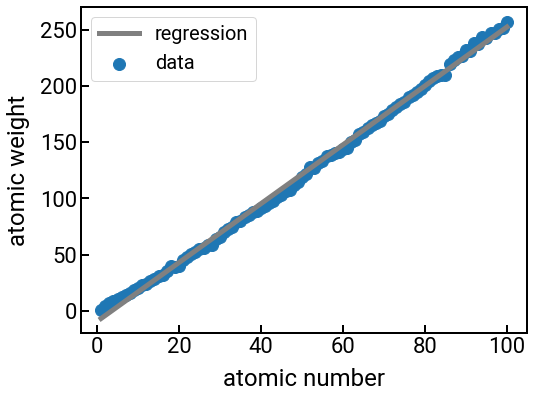

In [52]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('../../assets/data/week_1/04/elem_props.csv')
df.head()
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


### Visualizations: parity plots

Note that previously when we visualized our regression results, we showed output vs. inputs (a single feature), where the scattered points are $y$ (truth) vs. $x$ and the regression line was $\hat{y}$ (prediction) vs. $x$.
The regression line is really made of 100 predictions from our model, and these predicted points are connected by a line—this line is the line of best fit.

Another way to visualize the results, particularly when there are many input features, is with a **parity plot** or **predicted vs. actual plot**.
As the second name implies, this plot shows _a scatter plot_ of the predicted target values (from the model) on the $y$-axis and the actual target values (from the original dataset) on the $x$-axis.
A perfect model (error = 0.0) would have a parity plot where all the points lie along $y=x$ (all predicted points exactly match their true values).

### Exercise: please create a parity plot for your results from the previous part.

_Hints_: 
- We recommend making the marker sizes smaller, by passing `s=40` into the `ax.scatter()` method.
- One typically adds the line $y=x$ in the background of such a plot, to help guide the eye. 
To make the line appear _under the points_, pass `zorder=-5` as an input parameter.
- One also typically makes the axes of such figures equal, to emphasize that there should be a sense of "perfect $y=x$ agreement."
We can use the [`ax.set_aspect('equal')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html) method to do this!
- Definitely need axes labels!

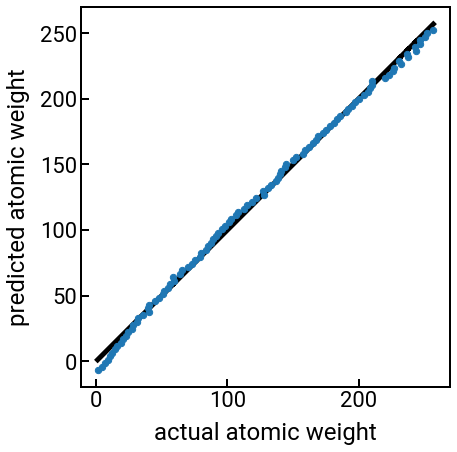

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


**Pause and reflect**: For what atomic weights are our linear regression model predicting _too high_? 
Where is it predicting _too low_?
This is how the parity plot helps with **interpretability** of our model predictions!



## Classification model performance

[Back to top](#Contents)

For classification metrics, rather than measuring a difference between real values, we're more concerned about whether the predicted class matches the true class.
Ironically, despite having fewer possible output values (they're now discrete class labels), the types of error metrics actually increases, so there's a lot that we could discuss.
So we only have time for a few of the most common ones.

We will again focus on binary classification to illustrate the idea, and actually start with a visualization: the **confusion matrix**.
For a two-class classification problem, the confusion matrix is given by 

|                   | Positive prediction | Negative prediction |
| :-----------      | :-------------      | :-------------      |
| _Positive label_: | True positive (TP)  | False negative (FN) |
| _Negative label_: | False positive (FP) | True negative (TN)  |

where TP, FP, FN, TN are typically counts given in integers.
For the confusion matrix, the **accuracy** of a classifer is generally speaking the most intuitive metric we could calculate, given by:

$$ \text{accuracy}\ = \frac{\text{TP + TN}}{\text{TP + FP + FN + TN}} \in [0, 1] $$

which is interpreted as "the number of correct classifications out of all data points."

### Scikit-learn performance metrics

Scikit-learn can compute confusion matrices and accuracy (and many other) classification performance metrics using functions in the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.

The confusion matrix given a target vector $\vec{y}$ and predicted classes $\hat{y}$ can be computed using the function [`confusion_matrix(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), which returns a matrix of dimension $\text{num_classes} \times \text{num_classes}$ with element $(i,j)$ being the number of samples with true label $i$ and predicted label $j$.
Note that **the order of the two input vectors matters**!
Also, if the labels are numerical (e.g., `0`, `1`), then the output confusion matrix is sorted from smallest to largest, so it might help to explicitly pass a `labels=[1, 0]` argument to fix the label order for the final confusion matrix [to match what we had above].

The accuracy can be computed by hand from the above confusion matrix, or if we want to directly compute it from the true classes $\vec{y}$ and predicted classes $\hat{y}$, we can use the [`accuracy_score(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function.

We again start with an example by hand to get the feel for things.

The confusion matrix is:
[[3 2]
 [1 4]]
The accuracy is: 0.7


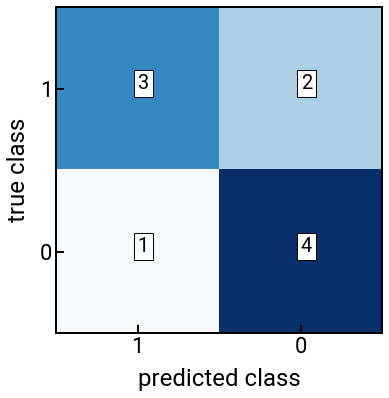

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y    = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
yhat = [1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
classes = [1, 0]
n = len(classes)
cm = confusion_matrix(y, yhat, labels=classes)
acc = accuracy_score(y, yhat)
print(f'The confusion matrix is:\n{cm}')
print(f'The accuracy is: {acc}')

fig, ax = plt.subplots()
ax.imshow(cm, cmap='Blues')
for i in range(n):
    for j in range(n):
        ax.text(j, i, s=cm[i, j], c='black', bbox=dict(fc='white'))  
        # note i,j had to be swapped above for labeling text!
        
ax.set_xticks(np.arange(n))
ax.set_xticklabels(classes)
ax.set_yticks(np.arange(n))
ax.set_yticklabels(classes)
ax.set_xlabel('predicted class')
ax.set_ylabel('true class')
plt.show()

### Exercise: compute both performance metrics for logistic regression for the metal classification problem

_Hints_:
- In this problem, you should use `lr.predict(X)` to get discrete predicted class labels instead of probabilities.
- Feel free to change up the features and see if you can increase your accuracy!

The confusion matrix is:
[[73  2]
 [ 2 23]]
The accuracy is: 0.96


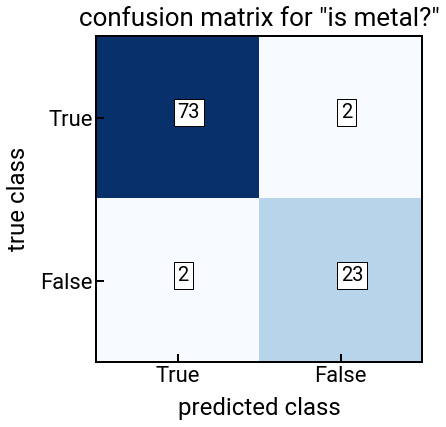

In [50]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('../../assets/data/week_1/04/elem_props.csv')
df.head()
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


### Caveat: F1 score 🏎 (on your own time)

If we had a little more time, or for those who are interested, we would discuss how accuracy _is not the best performance metric for classification_.
The biggest reason is due to **dataset imbalance**, which is most often the case with real-world data (materials and otherwise), such as the following: 
Imagine you do very well (20/20) for positive labels, and pretty well (900/980) for negative labels.
In other words, the confusion matrix is:

|                   | Positive prediction | Negative prediction |
| :-----------      | :-------------      | :-------------      |
| _Positive label_: | 20 TP  | 0 FN |
| _Negative label_: | 80 FP | 900 TN  |

What is your accuracy?
92%, which is not bad.
**But**, you might look at this classifier and think, "Uh oh, it's not picking negative labels that well, which would be a huge problem if those false positives corresponded to a disastrous consequence, like an electric car battery exploding." 😬

Therefore, we need a different metric(s), and the most common metrics you'll see in the literature for classification are actually **precision**, **recall**, and **F1 score**.

The _precision_ is the number of True positives out of all positive predictions, given by

$$ \frac{\text{TP}}{\text{TP + FP}} $$

It is useful when we want to _minimize false positives_ (since we want to maximize precision).

The _recall_ is the number of True positives out of all actual positives, given by

$$ \frac{\text{TP}}{\text{TP + FN}} $$

It is useful when we want to _minimize false negatives_ (since we want to maximize recall).

In most cases, there's a tradeoff between precision and recall, which is nicely illustrated in [this lesson from Google Developers](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall#precision-and-recall:-a-tug-of-war).
To balance these two distinct performance criteria, we can compute the **F1 score**, which is the harmonic mean of the two quantities:

$$ F_1 = \frac{2}{\text{precision}^{-1} + \text{recall}^{-1}} $$

If you want, you can experiment with the appropriate functions in [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to calculate these quantities.

<div class="alert alert-block alert-warning">
    <center><b>~ BREAK ~</b></center>
    At this point, we're going to give ourselves a short break before continuing further.
    Great work so far! 💪
</div>

## Train-validate-test

[Back to top](#Contents)

So far our workflow has been something like this:

1. Gather some data $X$ and $\vec{y}$ for the purposes of training the supervised ML model.
We call these data **training data**.
1. Fit (train) the ML model on these data, $X$ and $\vec{y}$, to learn the correct parameters $\vec{\theta}$.
1. Evaluate the ML model on $X$ to get the **training error**.

While this methodology is fine, it can be **misleading** in that we'll think our ML model is doing better than it really is. 
This is because we're evaluating its performance on data that it has already seen (been trained on), instead of _new, unseen data_ that would be a better test of the model's true predictive power.
This is not such a big deal with these simpler linear models, but will matter a great deal for more complex ML models, if you choose to use them, that can "memorize" the training data really well.
Imagine studying for an exam with practice problems, and then seeing those exact same questions appear on the real exam!

Given this, it is common to split our full dataset into **three parts**:

1. The **training data**, $X_{\text{train}}$ and $\vec{y}_{\text{train}}$, used for training our model's parameters.
1. The **validation data**, $X_{\text{val}}$ and $\vec{y}_{\text{val}}$, used for evaluating our trained model's performance.
The trained model's performance on the validation data is the validation error.
Depending on how satisfied we are with this, we might adjust our ML model, and repeat the training-validation loop.
1. The **test data**, $X_{\text{test}}$ and $\vec{y}_{\text{test}}$, used for evaluating our _final_ trained model's performance. 
Ideally (in theory), you will run your model on the test data _only once_, after all your validation iterations have finished!
The error incurred at this step is the **test error**. 
This is the error that everyone will care about and the one you should _always report_!

There's no real guidelines on how much of your data to allocate to each set.
Some common heuristics are 60/20/20 (train/val/test), 50/20/30, and 50/25/25.

### Splitting data in scikit-learn

How might you create these divisions?
A very simple way would just be to take (for a 50/20/30 split) the first 50% of the rows (examples) in $X$ _and_ $\vec{y}$ to be your training data.
Then take the next 20% of the rows to be your validation data.
Then use the remaining 30% to be your test data.
This could work, but it seems a little clunky to have to manually calculate the index of the splits, and we might actually induce **bias** by using adjacent examples, depending on how our data were collected/organized.

If we look inside the [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) module, we see there's a handy [`train_test_split(arrays, test_size=0.25, shuffle=True)`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function that will take a sequence of arrays and produce a randomized (shuffled) train/test split of **each** array according to the proportion specified with the `test_size` parameter.
For example, to execute a 50/20/30 split, one could do:
```python
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.30)             # first get test data
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.20)   # then get train/val data
```

## Cross-validation

[Back to top](#Contents)

As we know, in MI our datasets are often quite small (sometimes only dozens of data points), so it might not seem very practical to conduct a training/validation/test split when we ideally want to maximize the amount of training data available for training our ML models.
A common practice to help mitigate this issue and maximally leverage our data is through **cross-validation (CV)**.

In particular, we will be discussing a form of CV known as $k$**-fold CV**, where they data is randomly split into $k$ folds (groups), and we take turns building a ML model trained on $k-1$ folds and validating on the final fold. 
We repeat this for each of $k$ possible validation folds and average the results from all the validation trials to get the **CV error** (or whatever performance metric).

### scikit-learn for cross validation

If you thought splitting a dataset once into training/validation was hard, then imagine doing it $k$ times.
Luckily, scikit-learn has [so many options](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) that it's actually hard to make sense of them all.
We'll be looking at two of them:

- [`KFold(n_splits=5, shuffle=False)`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) is used to construct an object that saves our CV settings.
The arguments listed here are the default values.
- [`cross_val_score(estimator, X, y, scoring, cv)`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) is a function that takes many arguments, and we describe the five we are choosing to highlight below:
    - `estimator`: the ML model used to fit the data. It doesn't have to be fit yet.
    - `X`: the design matrix.
    - `y`: the target vector (for supervised learning).
    - `scoring`: a metric for evaluating performance, where _higher values are always better_. 
    There are many options, which you can see [here](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values).
    - `cv`: where the CV object goes.
- Later, on your own, you might be interested in the similar [`cross_val_predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function.

### Exercise: perform 5-fold CV for the atomic mass prediction problem.

_Hints_:
- You should construct a `KFold()` object.
- For `scoring`, use the `'neg_root_mean_squared_error'`.
It returns an array of scores, and you should print these.
- Start with `shuffle=False` inside the `KFold()` constructor. 
Then change it to `True`. 
Do your scores change? Why?

In [97]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
df = pd.read_csv('../../assets/data/week_1/04/elem_props.csv')
df.head()
X = df[['atomic_number']]
y = df['atomic_mass']
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


The CV errors are [-9.75586274 -3.34206262 -4.45252988 -2.22241969 -8.17178652].


## Conclusion

This concludes the exercises on model performance evaluation. 
In the third leg of this introduction to ML, we'll take a look at **featurization** for MI applications, which continues to build on this knowledge.
Therefore, please do let us know if you have questions about the material so far.

The coefficients are [2.62807048], -10.06934887630861.
The training RMSE is 3.661078741495548.
The test RMSE is 3.3078445580905362.


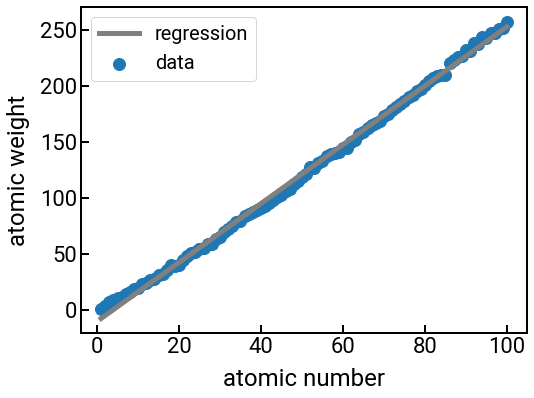

In [71]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #
